In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn
import h5py
import numpy as np
import itertools
from cnn_utils import *
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(1)

Using TensorFlow backend.


# Load Data

In [19]:
train_path = 'Spectograms_77_24_Xethrue_128x128/77_daily.hdf5'  # file path for the created .hdf5 file
trainset = h5py.File(train_path, "r")
train_path2 = 'Spectograms_77_24_Xethrue_128x128/24_daily.hdf5'  # file path for the created .hdf5 file
trainset2 = h5py.File(train_path2, "r")
train_path3 = 'Spectograms_77_24_Xethrue_128x128/XeThru_daily.hdf5'  # file path for the created .hdf5 file
trainset3 = h5py.File(train_path3, "r")

# valid_path = 'Spectograms_77_24_Xethrue_128x128/77_daily.hdf5'  # file path for the created .hdf5 file
# validset = h5py.File(valid_path, "r")
# valid_path2 = 'Spectograms_77_24_Xethrue_128x128/24_daily.hdf5'  # file path for the created .hdf5 file
# validset2 = h5py.File(valid_path2, "r")
# valid_path3 = 'Spectograms_77_24_Xethrue_128x128/XeThru_daily.hdf5'  # file path for the created .hdf5 file
# validset3 = h5py.File(valid_path3, "r")

test_path = 'Spectograms_77_24_Xethrue_128x128/77_daily.hdf5'  # file path for the created .hdf5 file
testset = h5py.File(test_path, "r")
test_path2 = 'Spectograms_77_24_Xethrue_128x128/24_daily.hdf5'  # file path for the created .hdf5 file
testset2 = h5py.File(test_path2, "r")
test_path3 = 'Spectograms_77_24_Xethrue_128x128/XeThru_daily.hdf5'  # file path for the created .hdf5 file
testset3 = h5py.File(test_path3, "r")

X_train_orig = np.array(trainset["train_img"])
Y_train_orig = np.array(trainset["train_labels"])
# X_valid_orig = np.array(validset["valid_img"])
# Y_valid_orig = np.array(validset["valid_labels"])
X_test_orig = np.array(testset["test_img"])
Y_test_orig = np.array(testset["test_labels"])
print('1. Radar''s Number of training samples: ', len(Y_train_orig))
# print('1. Radar''s Number of validation samples: ', len(X_valid_orig))
print('1. Radar''s Number of test samples: ', len(Y_test_orig))

X_train_orig2 = np.array(trainset2["train_img"])
Y_train_orig2 = np.array(trainset2["train_labels"])
# X_valid_orig2 = np.array(validset2["valid_img"])
# Y_valid_orig2 = np.array(validset2["valid_labels"])
X_test_orig2 = np.array(testset2["test_img"])
Y_test_orig2 = np.array(testset2["test_labels"])
print('2. Radar''s Number of training samples: ', len(X_train_orig2))
# print('2. Radar''s Number of validation samples: ', len(X_valid_orig2))
print('2. Radar''s Number of test samples: ', len(X_test_orig2))

X_train_orig3 = np.array(trainset3["train_img"])
Y_train_orig3 = np.array(trainset3["train_labels"])
# X_valid_orig3 = np.array(validset3["valid_img"])
# Y_valid_orig3 = np.array(validset3["valid_labels"])
X_test_orig3 = np.array(testset3["test_img"])
Y_test_orig3 = np.array(testset3["test_labels"])
print('3. Radar''s Number of training samples: ', len(X_train_orig3))
# print('3. Radar''s Number of validation samples: ', len(X_valid_orig3))
print('3. Radar''s Number of test samples: ', len(X_test_orig3))

trainset.close()
# validset.close()
testset.close()
trainset2.close()
# validset2.close()
testset2.close()
trainset3.close()
# validset3.close()
testset3.close()

1. Radars Number of training samples:  519
1. Radars Number of test samples:  130
2. Radars Number of training samples:  1695
2. Radars Number of test samples:  424
3. Radars Number of training samples:  614
3. Radars Number of test samples:  154


## Examine the shapes of data

In [20]:
X_train = X_train_orig/255.
# X_valid = X_valid_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 11).T
# Y_valid = convert_to_one_hot(Y_valid_orig, 11).T
Y_test = convert_to_one_hot(Y_test_orig, 11).T
print ("number of training examples = " + str(X_train.shape[0]))
# print ("number of validation examples = " + str(X_valid.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

X_train2 = X_train_orig2/255.
# X_valid2 = X_valid_orig2/255.
X_test2 = X_test_orig2/255.
Y_train2 = convert_to_one_hot(Y_train_orig2, 11).T
# Y_valid2 = convert_to_one_hot(Y_valid_orig2, 11).T
Y_test2 = convert_to_one_hot(Y_test_orig2, 11).T
print ("\nnumber of training examples = " + str(X_train2.shape[0]))
# print ("number of validation examples = " + str(X_valid2.shape[0]))
print ("number of test examples = " + str(X_test2.shape[0]))
print ("X_train2 shape: " + str(X_train2.shape))
print ("Y_train2 shape: " + str(Y_train2.shape))
# print ("X_valid2 shape: " + str(X_valid2.shape))
# print ("Y_valid2 shape: " + str(Y_valid2.shape))
print ("X_test2 shape: " + str(X_test2.shape))
print ("Y_test2 shape: " + str(Y_test2.shape))

X_train3 = X_train_orig3/255.
# X_valid3 = X_valid_orig3/255.
X_test3 = X_test_orig3/255.
Y_train3 = convert_to_one_hot(Y_train_orig3, 11).T
# Y_valid3 = convert_to_one_hot(Y_valid_orig3, 11).T
Y_test3 = convert_to_one_hot(Y_test_orig3, 11).T
print ("\nnumber of training examples = " + str(X_train3.shape[0]))
# print ("number of validation examples = " + str(X_valid3.shape[0]))
print ("number of test examples = " + str(X_test3.shape[0]))
print ("X_train3 shape: " + str(X_train3.shape))
print ("Y_train3 shape: " + str(Y_train3.shape))
# print ("X_valid3 shape: " + str(X_valid3.shape))
# print ("Y_valid3 shape: " + str(Y_valid3.shape))
print ("X_test3 shape: " + str(X_test3.shape))
print ("Y_test3 shape: " + str(Y_test3.shape))

number of training examples = 519
number of test examples = 130
X_train shape: (519, 128, 128, 3)
Y_train shape: (519, 11)
X_test shape: (130, 128, 128, 3)
Y_test shape: (130, 11)

number of training examples = 1695
number of test examples = 424
X_train2 shape: (1695, 128, 128, 3)
Y_train2 shape: (1695, 11)
X_test2 shape: (424, 128, 128, 3)
Y_test2 shape: (424, 11)

number of training examples = 614
number of test examples = 154
X_train3 shape: (614, 128, 128, 3)
Y_train3 shape: (614, 11)
X_test3 shape: (154, 128, 128, 3)
Y_test3 shape: (154, 11)


# Select Dataset

In [55]:
def select_data(flag):

    if flag==0:
        X_Train = X_train
        Y_Train = Y_train
    #     X_valid = X_valid
    #     Y_valid = Y_valid
        X_Test = X_test
        Y_Test = Y_test
        radar = 77
    elif flag==1:
        X_Train = X_train2
        Y_Train = Y_train2
    #     X_valid = X_valid2
    #     Y_valid = Y_valid2
        X_Test = X_test2
        Y_Test = Y_test2
        radar = 24
    elif flag==2: 
        X_Train = X_train3
        Y_Train = Y_train3
    #     X_valid = X_valid3
    #     Y_valid = Y_valid3
        X_Test = X_test3
        Y_Test = Y_test3
        radar = 10
    return radar, X_Train, Y_Train, X_Test, Y_Test

## Define Plotting & Saving Function

In [34]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,EPOCHS+1),history.history['accuracy'],label='Training')
    plt.plot(range(1,EPOCHS+1),history.history['val_accuracy'],label='Validation')
    plt.legend(loc=0)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xlim([1,EPOCHS])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('results/Model'+str(i)+'_'+str(radar)+'GHz'+'_Batchsize'+str(BATCH_SIZE)+'_learning'+str(lr)+'_dropout'+str(drop)+'-acc.png')
    plt.close(fig)
    # summarize history for loss
    fig2 = plt.figure()
    plt.plot(range(1,EPOCHS+1),history.history['loss'],label='Training')
    plt.plot(range(1,EPOCHS+1),history.history['val_loss'],label='Validation')
    plt.legend(loc=0)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xlim([1,EPOCHS])
    plt.grid(True)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    fig2.savefig('results/Model'+str(i)+'_'+str(radar)+'GHz'+'_Batchsize'+str(BATCH_SIZE)+'_learning'+str(lr)+'_dropout'+str(drop)+'-loss.png')
    plt.close(fig2)

In [35]:
# Hyperparams
IMAGE_SIZE = 128
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 100
BATCH_SIZE = 64
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [45]:
# Define a simple sequential model
def create_model(drop):
    model = Sequential()

    model.add(Conv2D(8, 8, 8, border_mode='same', input_shape=input_shape, activation='relu',trainable=False))
    model.add(Conv2D(8, 8, 8, border_mode='same', activation='relu',trainable=False))
    model.add(MaxPooling2D(pool_size=(2, 2),trainable=False))

    model.add(Conv2D(16, 4, 4, border_mode='same', activation='relu',trainable=False))
    model.add(Conv2D(16, 4, 4, border_mode='same', activation='relu',trainable=False))
    model.add(MaxPooling2D(pool_size=(4, 4),trainable=False))

    model.add(Conv2D(32, 2, 2, border_mode='same', activation='relu',trainable=False))
    model.add(Conv2D(32, 2, 2, border_mode='same', activation='relu',trainable=False))
    model.add(MaxPooling2D(pool_size=(4, 4),trainable=False)) #4,4
    
    model.add(Flatten(trainable=False))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(drop))

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(drop))
    
    model.add(Dense(11))
    model.add(Activation('softmax'))
    return model

# Load Trained Models

In [46]:
drop = 0.5

path77 = 'models/11_class_77.h5'
path24 = 'models/11_class_24.h5'
path10 = 'models/11_class_10.h5'

model77 = create_model(drop)
model24 = create_model(drop)
model10 = create_model(drop)

model77.load_weights(path77)
model24.load_weights(path24)
model10.load_weights(path10)

# Check the trainable status of the individual layers
for layer in model77.layers:
    print(layer, layer.trainable)

C:\Users\userpc\Anaconda3\envs\tensorflow2-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (8, 8), input_shape=(128, 128,..., activation="relu", trainable=False, padding="same")`
  """
C:\Users\userpc\Anaconda3\envs\tensorflow2-gpu\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (8, 8), activation="relu", trainable=False, padding="same")`
  
C:\Users\userpc\Anaconda3\envs\tensorflow2-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (4, 4), activation="relu", trainable=False, padding="same")`
  if __name__ == '__main__':
C:\Users\userpc\Anaconda3\envs\tensorflow2-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (4, 4), activation="relu", trainable=False, padding="same")`
  # Remove the CWD from sys.path while we load s

<keras.layers.convolutional.Conv2D object at 0x000000BCB71AD0C8> False
<keras.layers.convolutional.Conv2D object at 0x000000BCB04B0788> False
<keras.layers.pooling.MaxPooling2D object at 0x000000BC51910C88> False
<keras.layers.convolutional.Conv2D object at 0x000000BC5193C348> False
<keras.layers.convolutional.Conv2D object at 0x000000BC5194C708> False
<keras.layers.pooling.MaxPooling2D object at 0x000000BC519457C8> False
<keras.layers.convolutional.Conv2D object at 0x000000BC519427C8> False
<keras.layers.convolutional.Conv2D object at 0x000000BC51943C08> False
<keras.layers.pooling.MaxPooling2D object at 0x000000BC51923F88> False
<keras.layers.core.Flatten object at 0x000000BC51929B88> False
<keras.layers.core.Dense object at 0x000000BC51929048> True
<keras.layers.core.Dropout object at 0x000000BC5192B588> True
<keras.layers.core.Dense object at 0x000000BCB0A0CA08> True
<keras.layers.core.Dropout object at 0x000000BC5192B648> True
<keras.layers.core.Dense object at 0x000000BCB0A05808>

## Re-train Pre-trained Models

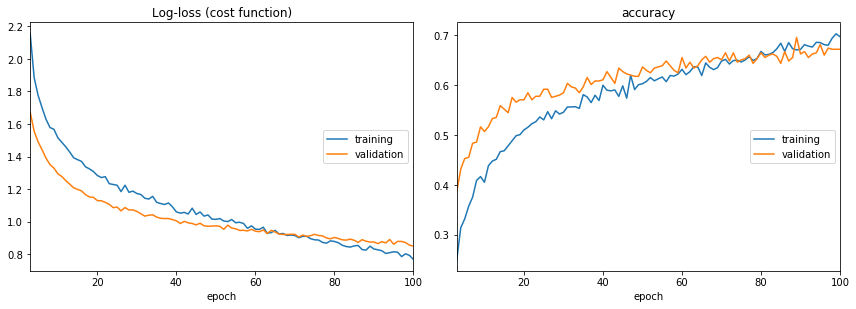

Log-loss (cost function):
training   (min:    0.769, max:    5.759, cur:    0.769)
validation (min:    0.851, max:    2.936, cur:    0.851)

accuracy:
training   (min:    0.156, max:    0.703, cur:    0.697)
validation (min:    0.184, max:    0.696, cur:    0.672)


In [59]:
lr = 0.0001
# define optimiz75
optim = Adam(lr=lr, decay=1e-06) # decay rate = 5e-06 for xethru
# compile the model
model = model10
flag = 1 # set flag: '0' for 77ghz, '1' for 24ghz, '2' for 10ghz
[radar, X_train, Y_train, X_test, Y_test] = select_data(flag) 
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

# fit the model
history1 = model.fit(X_train, Y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=1,
                validation_data=(X_test, Y_test),
                callbacks = [PlotLossesCallback()]
                     )

### Testing Accuracy

In [51]:
model.evaluate(X_test,Y_test)

154/154 [==============================] - 1s 8ms/step


[0.7943357709166291, 0.7142857313156128]